In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [125]:
import os
import time

In [3]:
DATA_PATH = '../input/'
SUB_PATH = '../submissions/'

In [4]:
train_df = pd.read_csv(f'{DATA_PATH}/train.csv')
test_df = pd.read_csv(f'{DATA_PATH}/test.csv')

In [5]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train_df.shape

(54808, 14)

In [7]:
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
test_df.shape

(23490, 13)

In [10]:
test_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

## EDA

- This dataset contains data of employees who are nominated for promotion and have completed atleast 60% KPI.
- so the main goal of this problem is to predict if an employee will get promoted or not out of all employees who has nominated and got KPI > 60%.
- All the nominated employees have cleared 3 steps of the pramotion process in this company and how after final decision they will be promoted

In [42]:
def plot_dist_train_test(train_se, test_se, figsize=(14, 7), categorical=True, freq=True, kde=False):
    f, ax = plt.subplots(ncols=2, figsize=figsize)
    if categorical:
        tr = train_se.fillna('missing').value_counts(normalize= (True if freq else False))
        te = test_se.fillna('missing').value_counts(normalize= (True if freq else False))
        sns.barplot(x=tr.values, y=tr.index, ax=ax[0], orient="h")
        sns.barplot(x=te.values, y=te.index, ax=ax[1], orient="h")
        ax[0].set(title='Train dataset', ylabel=train_se.name)
        ax[1].set(title='Test dataset')
    else:
        sns.distplot(train_se, ax=ax[0], kde=kde, orient="h")
        sns.distplot(test_se, ax=ax[1], kde=kde, orient="h")
    f.suptitle('Distribution of ' + train_se.name)
    plt.show()

### Univariate analysis

#### `is_promoted` (target variable)

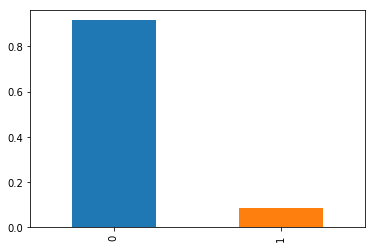

In [27]:
train_df['is_promoted'].value_counts(normalize=True).plot(kind='bar')
plt.show()

- imbalanced dataset.
- around 8.5% employees are promoted

#### `department`

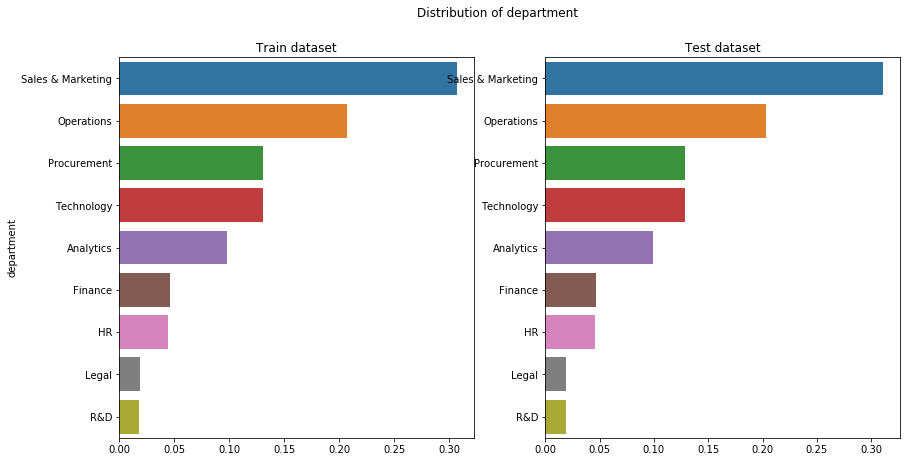

In [21]:
plot_dist_train_test(train_df['department'], test_df['department'])

- more employees are from Sales & Marketing department in this dataset.
- maybe because there are more positions available for promotion for this department (maybe because this company has big Sales & Marketing department compared to others)
- or there are more qualified employees in this department, so that they are nominated for promotion.

In [92]:
train_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

#### `region`

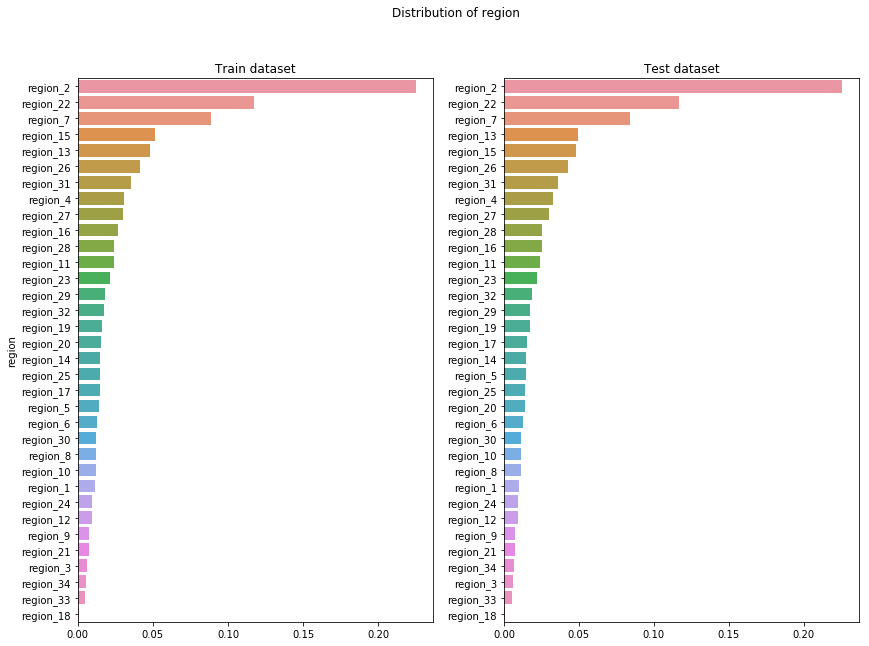

In [23]:
plot_dist_train_test(train_df['region'], test_df['region'], figsize=(14,10))

- There are total 34 regions.
- 23% employees are employed in at region 2 office.

#### `education`

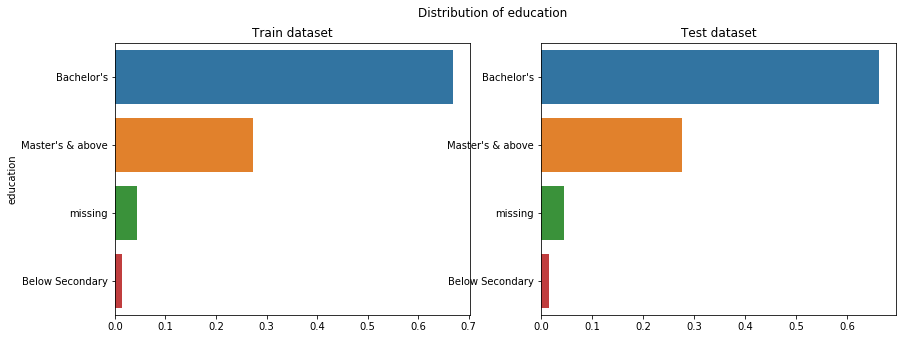

In [34]:
plot_dist_train_test(train_df['education'], test_df['education'], figsize=(14,5))

- More employees has Education level of Bachelor's.
- Maybe in this company most employees has Bachelor's degree, that's why we have more Bachelor's degree employees.

#### `gender`

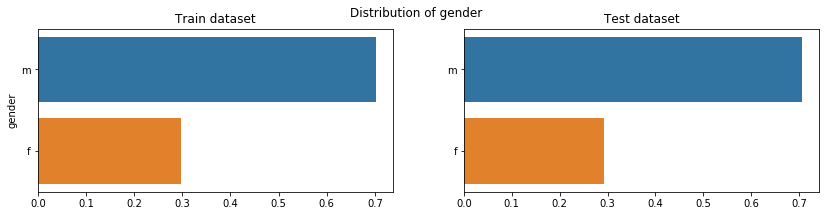

In [33]:
plot_dist_train_test(train_df['gender'], test_df['gender'], figsize=(14, 3))

- 70% employees are Male.
- 30% employees are Female.
- maybe company has more Male employees.
- or Male employees performs well.

#### `recruitment_channel`

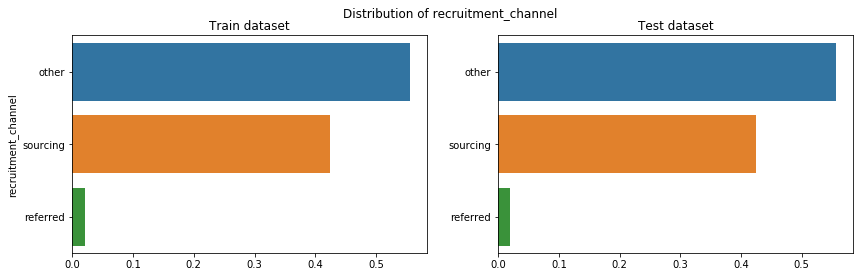

In [44]:
plot_dist_train_test(train_df['recruitment_channel'], test_df['recruitment_channel'], figsize=(14, 4))

#### `no_of_trainings`

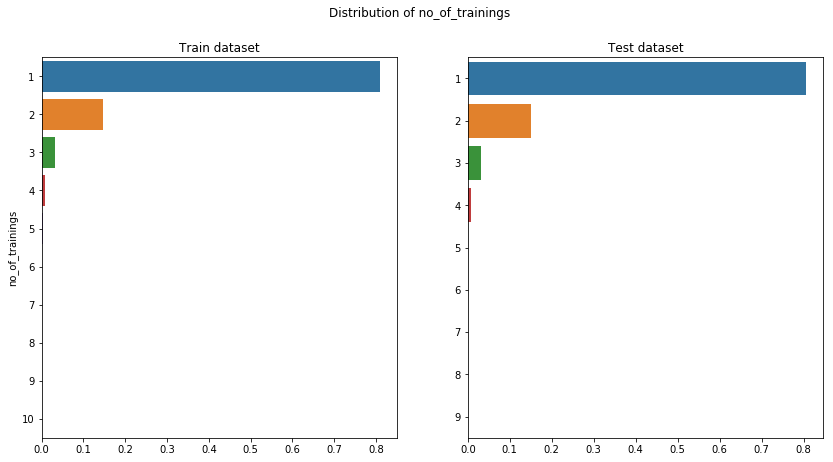

In [43]:
plot_dist_train_test(train_df['no_of_trainings'], test_df['no_of_trainings'], categorical=True)

#### `previous_year_rating`

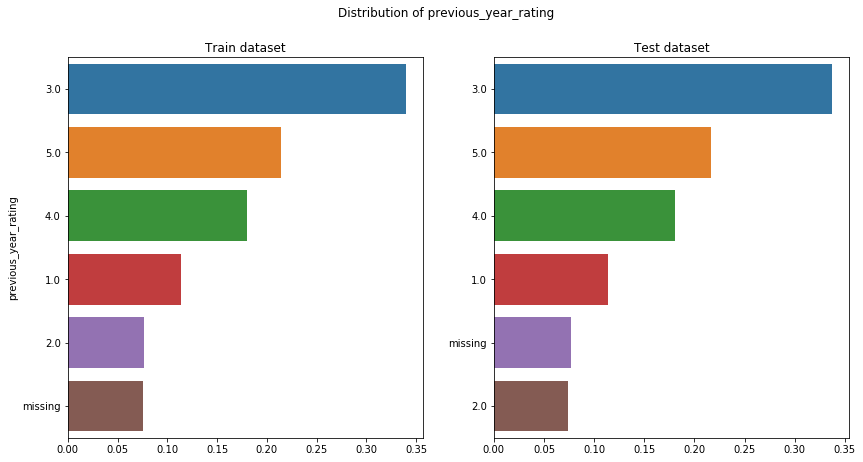

In [45]:
plot_dist_train_test(train_df['previous_year_rating'], test_df['previous_year_rating'])

- previous year rating is ordinal variable with minimum value 1 and maximum value 5.

#### `length_of_service`

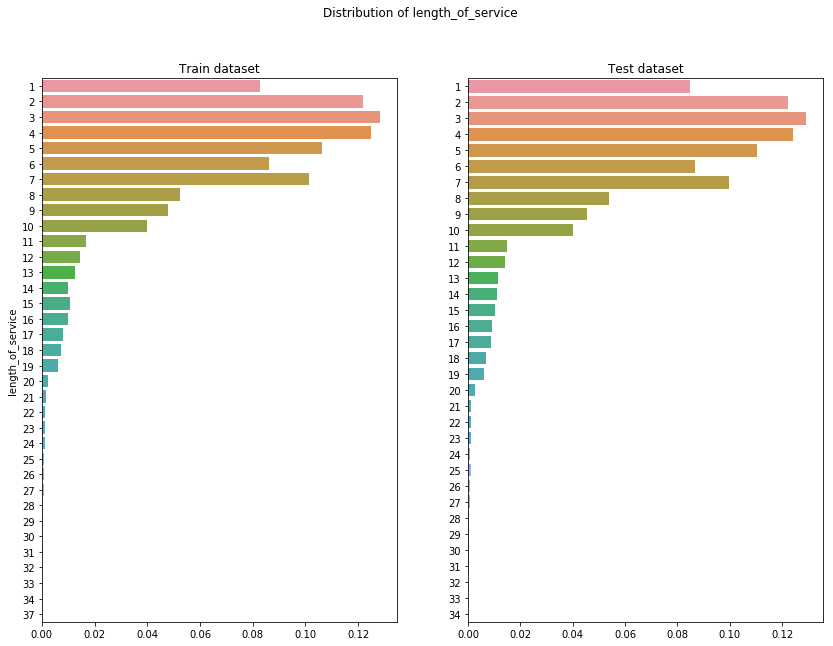

In [49]:
plot_dist_train_test(train_df['length_of_service'], test_df['length_of_service'], figsize=(14, 10))

#### `KPIs_met >80%`

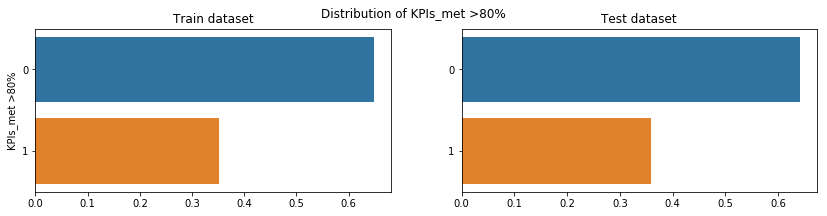

In [52]:
plot_dist_train_test(train_df['KPIs_met >80%'], test_df['KPIs_met >80%'], figsize=(14,3))

#### `awards_won?`

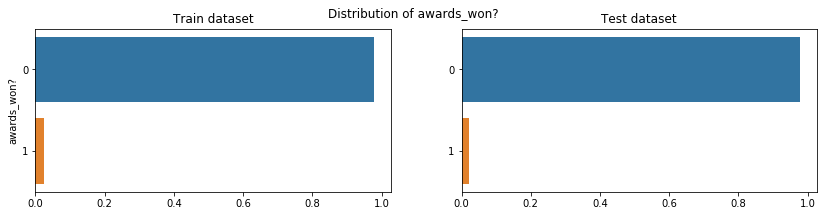

In [53]:
plot_dist_train_test(train_df['awards_won?'], test_df['awards_won?'], figsize=(14, 3))

#### `avg_training_score`

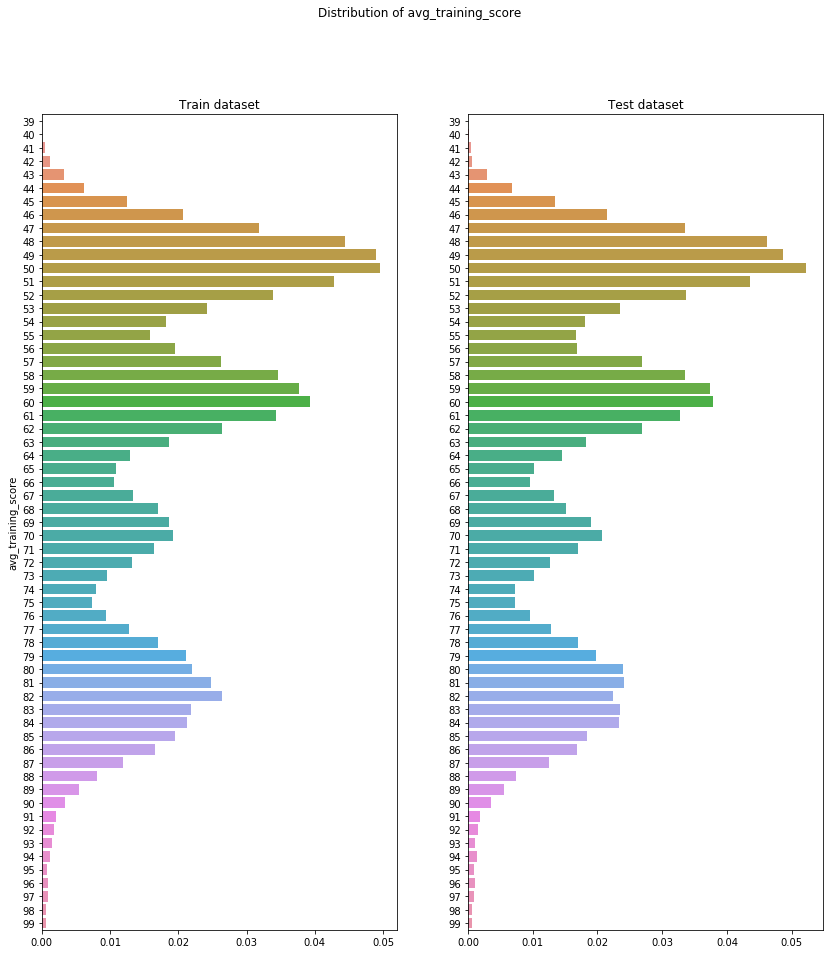

In [55]:
plot_dist_train_test(train_df['avg_training_score'], test_df['avg_training_score'], figsize=(14,15))

#### `age`

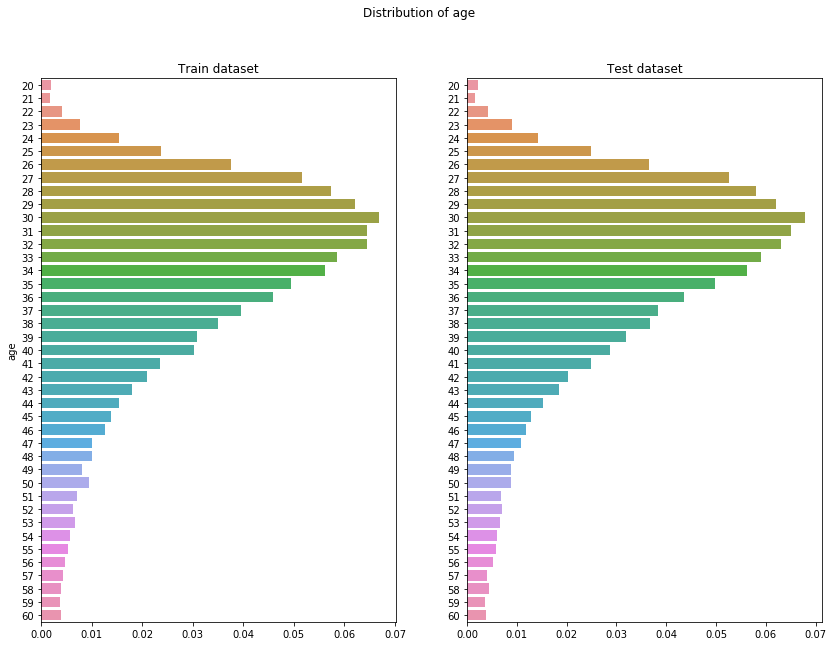

In [57]:
plot_dist_train_test(train_df['age'], test_df['age'], figsize=(14, 10))

#### `employee_id`

In [69]:
train_df['employee_id'].nunique()

54808

In [70]:
train_df.shape[0]

54808

In [71]:
test_df['employee_id'].nunique()

23490

In [72]:
test_df.shape[0]

23490

In [74]:
len(set(test_df['employee_id'].unique()) - set(train_df['employee_id'].unique()))

23490

- Every record has unique employee id.
- That means this data is only of one promotion period.

### Fill missing values

#### `previous_year_rating`

In [67]:
train_df['previous_year_rating'].isnull().sum()

4124

In [66]:
train_df[train_df['length_of_service'] == 1]['previous_year_rating'].isnull().sum()

4124

In [86]:
(train_df['length_of_service']==1).sum()

4547

In [91]:
train_df[(train_df['length_of_service'] == 1) & (~train_df['previous_year_rating'].isnull())]['previous_year_rating'].value_counts(normalize=True)

3.0    0.373522
4.0    0.269504
5.0    0.151300
1.0    0.104019
2.0    0.101655
Name: previous_year_rating, dtype: float64

In [90]:
train_df[~train_df['previous_year_rating'].isnull()]['is_promoted'].value_counts(normalize=True)

0    0.914588
1    0.085412
Name: is_promoted, dtype: float64

- Every records with missing `previous_year_rating` value has  `length_of_service` columns value 1.
- There must be some relation between them.
- previous_year_rating has values betweek [1, 5].
- This is ordinal veriable.
- As we can see from below graph as previous_year_rating increase, chances of promotion also increase,
- so putting 0 in this missing values maybe considered as little bit less qualified employee.
- But records which has missing previous_year_rating values has 8.2 % chance of promotion.
- Maybe these guys haven't got previous year rating yet because it's been only 1 year in this company for them.
- we can ue one hot encoding for this column.

In [89]:
train_df[train_df['previous_year_rating'].isnull()]['is_promoted'].value_counts(normalize=True)

0    0.917798
1    0.082202
Name: is_promoted, dtype: float64

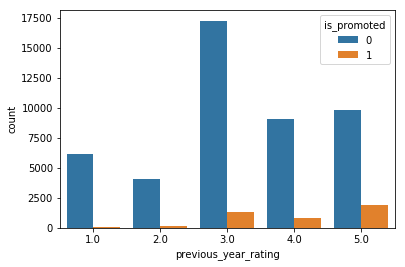

In [85]:
sns.countplot(train_df['previous_year_rating'], hue=train_df['is_promoted'])
plt.show()

In [82]:
train_df[train_df['previous_year_rating'] == 1]['is_promoted'].value_counts(normalize=True)

0    0.985859
1    0.014141
Name: is_promoted, dtype: float64

In [83]:
train_df[train_df['previous_year_rating'] == 2]['is_promoted'].value_counts(normalize=True)

0    0.95716
1    0.04284
Name: is_promoted, dtype: float64

In [79]:
train_df[train_df['previous_year_rating'] == 3]['is_promoted'].value_counts(normalize=True)

0    0.927221
1    0.072779
Name: is_promoted, dtype: float64

In [80]:
train_df[train_df['previous_year_rating'] == 4]['is_promoted'].value_counts(normalize=True)

0    0.920624
1    0.079376
Name: is_promoted, dtype: float64

In [84]:
train_df[train_df['previous_year_rating'] == 5]['is_promoted'].value_counts(normalize=True)

0    0.836385
1    0.163615
Name: is_promoted, dtype: float64

#### `education`

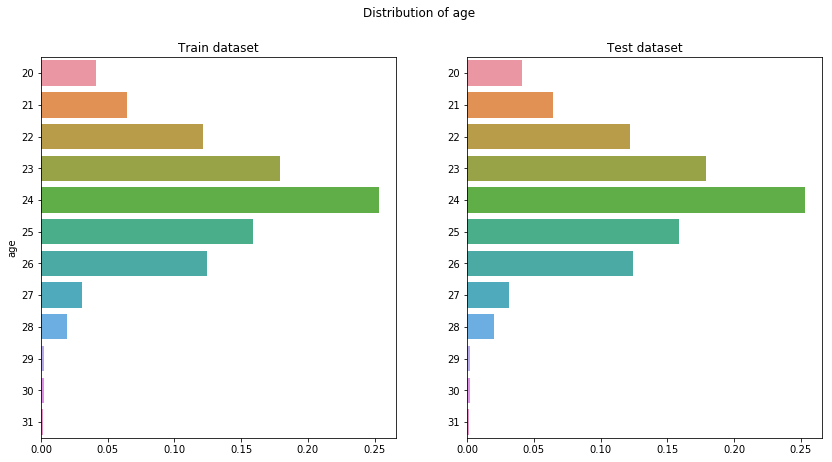

In [103]:
# for education level Below Secondary
plot_dist_train_test(train_df[train_df['education']=='Below Secondary']['age'], train_df[train_df['education']=='Below Secondary']['age'])

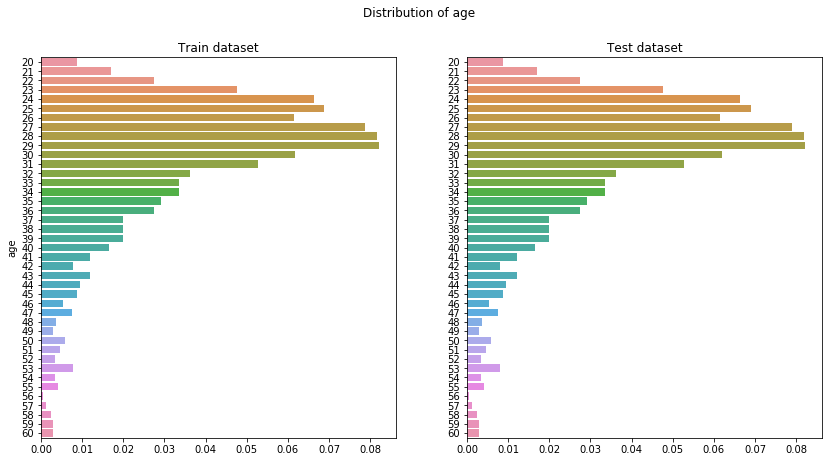

In [113]:
# for missing education level records
plot_dist_train_test(train_df[train_df['education'].isnull()]['age'], train_df[train_df['education'].isnull()]['age'])

- in education column we have bachelor's, master's & above, below secondary.
- below secondary means only primary education.
- so maybe these records with missing education can be secondary education.
- Let's take OHE of this and use NaN as new category.

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

### RF classifier

#### Prepare data

In [80]:
train_df = pd.read_csv(f'{DATA_PATH}/train.csv')
test_df = pd.read_csv(f'{DATA_PATH}/test.csv')

In [81]:
train_df['education'].fillna('Secondary', inplace=True)
train_df['previous_year_rating'].fillna(0, inplace=True)

In [82]:
test_df['education'].fillna('Secondary', inplace=True)
test_df['previous_year_rating'].fillna(0, inplace=True)

In [83]:
train_df.loc[train_df['gender']=='m', 'gender'] = 1
train_df.loc[train_df['gender']=='f', 'gender'] = 0
train_df['gender'] = train_df['gender'].astype('int')

In [84]:
test_df.loc[test_df['gender']=='m', 'gender'] = 1
test_df.loc[test_df['gender']=='f', 'gender'] = 0
test_df['gender'] = test_df['gender'].astype('int')

In [85]:
dum_cols = ['department', 'education', 'recruitment_channel', 'previous_year_rating']
temp_tr = pd.get_dummies(train_df[dum_cols])
train_df.drop(dum_cols, axis=1, inplace=True)
train_df = train_df.join(temp_tr)
temp_te = pd.get_dummies(test_df[dum_cols])
test_df.drop(dum_cols, axis=1, inplace=True)
test_df = test_df.join(temp_te)

In [86]:
train_df.head()

,employee_id,region,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Secondary,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,region_7,0,1,35,8,1,0,49,0,...,0,1,0,0,0,1,0,0,0,1
1,65141,region_22,1,1,30,4,0,0,60,0,...,0,0,0,1,0,0,0,1,0,0
2,7513,region_19,1,1,34,7,0,0,50,0,...,0,1,0,1,0,0,0,0,0,1
3,2542,region_23,1,2,39,10,0,0,50,0,...,0,1,0,1,0,0,0,1,0,0
4,48945,region_26,1,1,45,2,0,0,73,0,...,0,0,1,1,0,0,0,1,0,0


In [87]:
features = [i for i in test_df.columns if i not in ['employee_id', 'region']]
target = 'is_promoted'

#### model

In [94]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
'''
def cutoff_prediction(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)

# for cross_val_score
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_prediction(clf, X, cutoff)
        return f1_score(y, ypred)
    
    return f1_cutoff
'''

'\ndef cutoff_prediction(clf, X, cutoff):\n    return (clf.predict_proba(X)[:,1]> cutoff).astype(int)\n\n# for cross_val_score\ndef custom_f1(cutoff):\n    def f1_cutoff(clf, X, y):\n        ypred = cutoff_prediction(clf, X, cutoff)\n        return f1_score(y, ypred)\n    \n    return f1_cutoff\n'

In [106]:
def cutoff_f1(y, y_pred, cutoff):
    ypred = (y_pred[:,1]>cutoff).astype(int)
    return f1_score(y, ypred)

In [107]:
f1_3 = make_scorer(score_func=cutoff_f1, cutoff = 0.3, greater_is_better=True, needs_proba=True)
f1_4 = make_scorer(score_func=cutoff_f1, cutoff = 0.4, greater_is_better=True, needs_proba=True)
f1_5 = make_scorer(score_func=cutoff_f1, cutoff = 0.5, greater_is_better=True, needs_proba=True)
f1_6 = make_scorer(score_func=cutoff_f1, cutoff = 0.6, greater_is_better=True, needs_proba=True)

In [108]:
scoring = {'f1_0.3': f1_3, 'f1_0.4': f1_4, 'f1_0.5': f1_5, 'f1_0.6': f1_6, 'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score) }

In [129]:
rf_clf = RandomForestClassifier(random_state=2018)
rf_clf_param = {'random_state': [2018], 'n_estimators': [50,500], 'min_samples_split': [6, 10], 'min_samples_leaf':[1, 5], 'oob_score':[False], 'class_weight': ['balanced', {0: 0.01, 1: 20}, {0: 0.1, 1: 10}]}

In [130]:
skf = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)

In [131]:
rf_cv = GridSearchCV(estimator=rf_clf, param_grid=rf_clf_param, cv=skf, scoring=scoring, refit=False, n_jobs=-1)

In [132]:
t1 = time.time()
rf_cv.fit(train_df[features], train_df[target])
t2 = time.time()

In [136]:
print(str((t2-t1)/60) + ' minutes')

28.16451588869095 minutes


In [133]:
rf_cv.cv_results_

/home/nishant/venvs_dir/DS/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_f1_0.3'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nishant/venvs_dir/DS/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_f1_0.3'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nishant/venvs_dir/DS/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_f1_0.3'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nishant/ve

{'mean_fit_time': array([ 5.29083595, 57.30927496,  4.64657979, 49.31937079,  5.52648444,
        44.76283669,  4.71867237, 40.62141948,  5.55736713, 52.41354256,
         4.0884656 , 41.22704864,  4.03288875, 37.11546512,  3.62454534,
        36.91320229,  4.35571175, 39.40064316,  4.28266454, 40.08052726,
         3.91362801, 38.35818253,  4.04649572, 35.44010062]),
 'std_fit_time': array([0.42137187, 2.90367605, 0.41314405, 1.65354591, 0.79169376,
        2.74552649, 0.68496126, 3.50602259, 1.12935908, 8.6746721 ,
        0.16329682, 0.72552602, 0.32925462, 1.07885867, 0.4372063 ,
        1.07947814, 0.33591947, 0.98761164, 0.46505861, 2.17041836,
        0.29341887, 2.6626826 , 0.22566988, 6.80421952]),
 'mean_score_time': array([ 1.65044165, 13.58103476,  1.57706285, 13.60458579,  1.39350424,
        13.32393751,  1.46173482, 11.44256744,  1.51261349, 14.63848805,
         1.22154512, 12.85924492,  1.19468932, 11.00994859,  1.04280667,
        11.31784167,  1.26163483, 13.15084896

{'class_weight': 'balanced',  
   'min_samples_leaf': 1,  
   'min_samples_split': 6,  
   'n_estimators': 50,  
   'oob_score': False,  
   'random_state': 2018}  
RF with 0.5 cutoff.  
F1 : 0.47365376 , std :  0.0248893  
precision : 0.54232882 , std : 0.02941178  
Recall : 0.42053306 , std : 0.02255639  
it seems like overfitting is happening.  
Public LB : 0.47093451066961

====================================================================

RF, n_estimators=200, min_samples_split=5, class_weight='balanced', cutoff=0.4 , F1 = 0.4785873560988933
Public LB = 

In [135]:
rf_clf = RandomForestClassifier(random_state=2018, class_weight= 'balanced', min_samples_leaf = 1, min_samples_split= 6, n_estimators= 50, oob_score= False)

In [137]:
rf_clf.fit(train_df[features], train_df[target])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=2018,
            verbose=0, warm_start=False)

In [138]:
imp = rf_clf.feature_importances_
imp, fe_names = zip(*sorted(zip(imp, features), reverse=True))

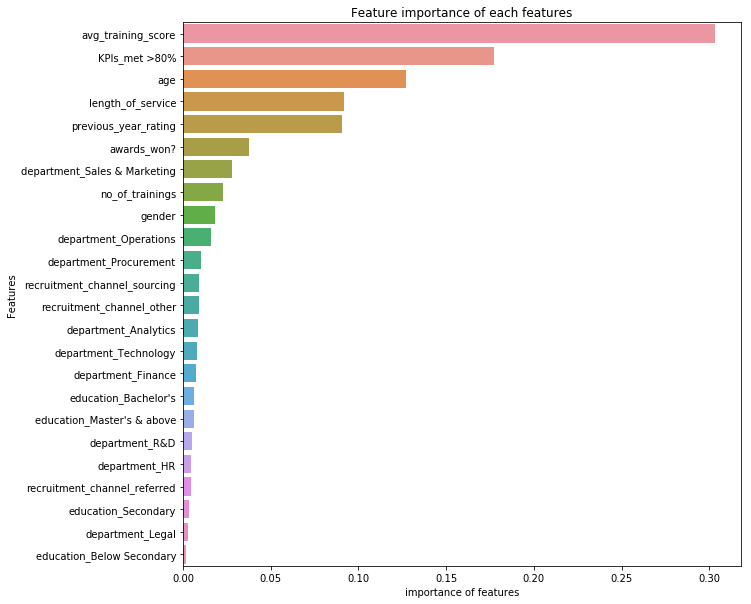

In [141]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x= list(imp), y= list(fe_names))
ax.set(title='Feature importance of each features', ylabel='Features', xlabel='importance of features')
plt.show()

In [142]:
sub = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')

In [143]:
sub['is_promoted'] = rf_clf.predict(test_df[features])

In [144]:
sub['is_promoted'].value_counts(normalize=True)

0    0.936356
1    0.063644
Name: is_promoted, dtype: float64

In [145]:
sub.to_csv(f'{SUB_PATH}/rf2.csv', index=False)